<a href="https://www.kaggle.com/code/arnabmukherjee853/fashion-mnist-cnn-image-classification?scriptVersionId=195341187" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Conv2D, Dense, Dropout, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D

2024-09-04 19:08:20.711402: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 19:08:20.711536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 19:08:20.875836: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Loading Data from TensorFlow Fashion-Mnist**


In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(Xtrain,Ytrain), (Xtest,Ytest) = fmnist.load_data()
Xtrain, Xtest = Xtrain/255.0, Xtest/255.0
print(Xtrain.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)


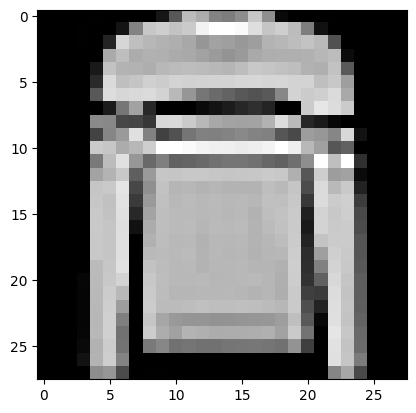

In [4]:
plt.imshow(Xtrain[5], cmap='gray')
plt.show()

In [5]:
Xtrain = np.expand_dims(Xtrain, -1)
Xtest = np.expand_dims(Xtest, -1)
print(Xtrain.shape)

(60000, 28, 28, 1)


In [6]:
K = len(set(Ytrain))
print("No of Predictive Classes ",K)

No of Predictive Classes  10


**Building a simple CNN model using keras functional api**

In [7]:
i = Input(shape=Xtrain[0].shape)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dense(200, activation='relu')(x)
x = Dropout(.22)(x)
x = Dense(400, activation='relu')(x)
x = Dropout(.22)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i,x)

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7314 - loss: 0.7320 - val_accuracy: 0.8502 - val_loss: 0.4051
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8612 - loss: 0.3793 - val_accuracy: 0.8529 - val_loss: 0.3854
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8813 - loss: 0.3159 - val_accuracy: 0.8814 - val_loss: 0.3249
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8956 - loss: 0.2797 - val_accuracy: 0.8822 - val_loss: 0.3334
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9069 - loss: 0.2486 - val_accuracy: 0.8860 - val_loss: 0.3138
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9135 - loss: 0.2284 - val_accuracy: 0.8878 - val_loss: 0.3209
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9225 - loss: 0.2054 - val_accuracy: 0.8885 - val_loss: 0.3305
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9285 - loss: 0

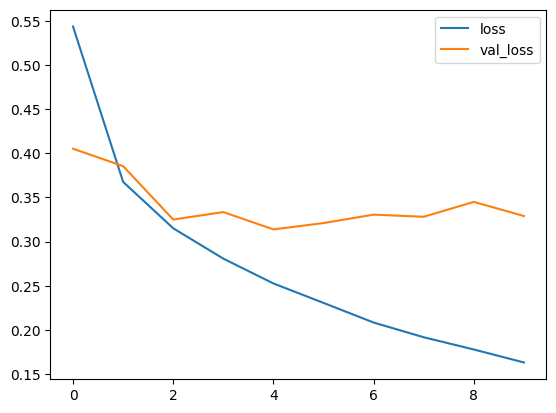

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

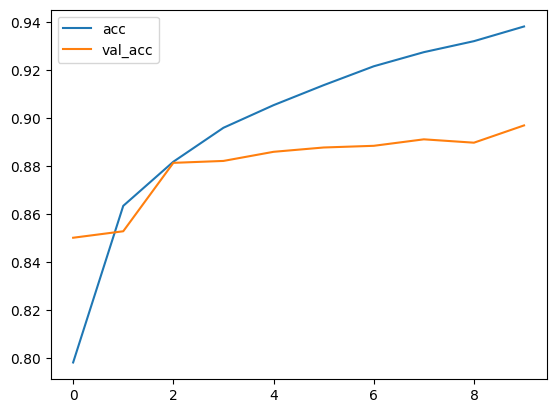

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
p_test = model.predict(Xtest).argmax(axis=1)
confusion_matrix(Ytest, p_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[857,   1,  20,  27,   1,   2,  88,   0,   4,   0],
       [  4, 979,   0,  11,   3,   0,   2,   0,   1,   0],
       [ 15,   1, 859,  10,  53,   0,  62,   0,   0,   0],
       [ 15,   7,  13, 913,  27,   1,  23,   0,   1,   0],
       [  0,   2,  60,  30, 833,   0,  73,   0,   2,   0],
       [  0,   0,   0,   0,   0, 972,   0,  17,   0,  11],
       [115,   1,  79,  34,  92,   1, 672,   0,   6,   0],
       [  0,   0,   0,   0,   0,  18,   0, 965,   0,  17],
       [  2,   1,   7,   3,   4,   3,   7,   4, 969,   0],
       [  1,   0,   0,   0,   0,   4,   0,  44,   0, 951]])

In [12]:
print(classification_report(Ytest, p_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.86      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.82      0.83      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.72      0.67      0.70      1000
           7       0.94      0.96      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [13]:
i = Input(shape= Xtrain[0].shape)
x = Conv2D(32,(3,3), strides=(2,2), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x = Flatten()(x)
x = Dropout(.2)(x)
x = Dense(200, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(400, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

MOdel = Model(i,x)
MOdel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
R = MOdel.fit(Xtrain, Ytrain, validation_data=(Xtest,Ytest), epochs=15)
# batch_size= 50
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
#                                                                  height_shift_range=0.1,
#                                                                  horizontal_flip=True,
#                                                                  vertical_flip=True,
#                                                                  rotation_range=45)
# train_generator = data_generator.flow(Xtrain, Ytrain, batch_size)
# steps_per_epoch = Xtrain.shape[0]//batch_size
# R = MOdel.fit_generator(train_generator,
#                         validation_data=(Xtest,Ytest),
#                         steps_per_epoch= steps_per_epoch,
#                         epochs=25)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.7654 - loss: 0.6576 - val_accuracy: 0.8628 - val_loss: 0.3673
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8730 - loss: 0.3474 - val_accuracy: 0.8892 - val_loss: 0.3065
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8905 - loss: 0.2985 - val_accuracy: 0.8870 - val_loss: 0.2986
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9017 - loss: 0.2704 - val_accuracy: 0.8915 - val_loss: 0.2926
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9121 - loss: 0.2417 - val_accuracy: 0.8892 - val_loss: 0.3099
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9183 - loss: 0.2267 - val_accuracy: 0.8985 - val_loss: 0.2862
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9211 - loss: 0.2132 - val_accuracy: 0.9024 - val_loss: 0.2808
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9258 -

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
pm_test = MOdel.predict(Xtest).argmax(axis=1)
confusion_matrix(Ytest, pm_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[877,   0,  18,  15,   4,   1,  83,   0,   2,   0],
       [  2, 985,   1,   8,   1,   0,   0,   0,   2,   1],
       [ 19,   1, 879,  11,  41,   0,  49,   0,   0,   0],
       [ 15,   8,  10, 922,  26,   0,  18,   0,   1,   0],
       [  1,   1,  74,  17, 873,   1,  33,   0,   0,   0],
       [  0,   0,   0,   0,   0, 984,   0,  11,   0,   5],
       [113,   2,  50,  25,  96,   0, 709,   0,   5,   0],
       [  0,   0,   0,   0,   0,  12,   0, 969,   0,  19],
       [  1,   2,   4,   4,   3,   1,   3,   3, 976,   3],
       [  0,   0,   0,   0,   0,   2,   0,  23,   1, 974]])

In [15]:
print(classification_report(Ytest, pm_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.88      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.84      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.79      0.71      0.75      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



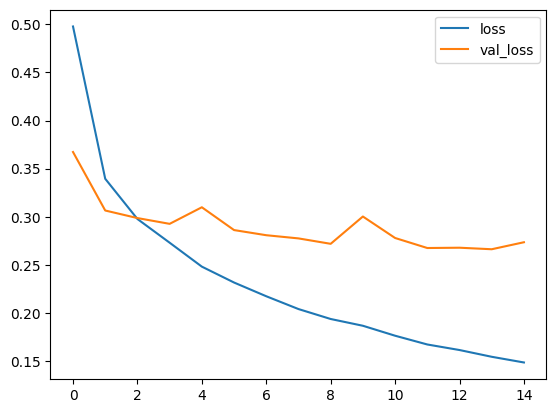

In [16]:
plt.plot(R.history['loss'], label='loss')
plt.plot(R.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

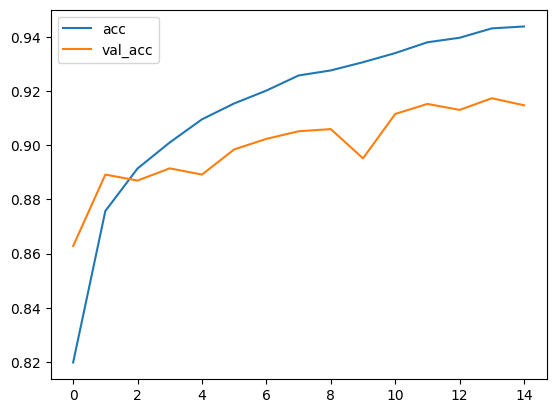

In [17]:
plt.plot(R.history['accuracy'], label='acc')
plt.plot(R.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()